Introduction....





Initialize

In [1]:
# The usual preamble
%matplotlib inline
#%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 100)

plt.rcParams['figure.figsize'] = (15, 5)
def getMap(df,column):
    indexMap = {}
    for i,value in enumerate(df[column].value_counts().index):
        indexMap[value]=i
    return indexMap

Load training and test data
Take a look at the training data

In [2]:
sfcrime_train = pd.read_csv('../data/train.csv',parse_dates='Dates',index_col='Dates')
sfcrime_test = pd.read_csv('../data/test.csv',parse_dates='Dates',index_col='Dates')
sfcrime_train

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601


Let's have a look at the training data.
What are the different types of crimes? And how often do they occur?

In [3]:
sfcrime_train['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

Do these seem to vary by time?
Setup some plotting code

In [4]:
def crime_by_time(df,crime,unit="Hour"):
    """
    Create index based on timing criteria
    """
    crime = df[df['Category'] == crime].copy()
    if unit=="Hour":
        crime.loc[:,unit] = crime.index.hour
    elif unit=="Day":
        crime.loc[:,unit] = crime.index.dayofyear
    elif unit=="Year":
        crime.loc[:,unit] = crime.index.year
    elif unit=="Month":
        crime.loc[:,unit] = crime.index.month
    elif unit=="Weekday":
        crime.loc[:,unit] = crime.index.weekday

    crime[unit].astype(int)
    return crime[unit].value_counts()
def plot_category_vs_feature(df,donorm=False,xlabel=''):
    """
    Plot 2d histogram of crime categories vs some features.
    Assumes as input dataframe with the feature of interest as the index
    and the columns as the crime categories.
    """
 
    df = df.fillna(0)

    #build values and weights for histogram
    (nfeatures,ncategories) = df.shape
    x = []
    y = []
    weights = []
    for i in range(nfeatures):
        for j in range(ncategories):
            weights.append(df.iloc[i,j])
            x.append(i)
            y.append(j)

    #format plot
    fig,ax = plt.subplots(figsize=(15,10))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    for i in range(nfeatures): ax.text(i,-1.5,df.index[i],
                                    horizontalalignment='center')
    for j in range(ncategories):  ax.text(-.7,j,df.columns[j],
                                          horizontalalignment='right',
                                          verticalalignment='center')
    ax.text(nfeatures/2.,-3,xlabel)

    #draw histogram
    x_array = np.array(x)
    y_array = np.array(y)
    weights_array = np.array(weights)
    plt.hist2d(x=x_array,y=y_array,weights=weights_array,
               bins=[np.array([x -.5 for x in range(nfeatures+1)]),
                     np.array([x - .5 for x in range(ncategories+1)])])
    plt.colorbar()
def plot_category_vs_time(df,unit,donorm=False):
    """
    Plot 2d histogram of crime categories vs time
    """
    #build data fram just of categories versus specific unit of time
    dset = {}
    for category,norm in zip(df['Category'].value_counts()[:].index,
                             df['Category'].value_counts()[:]):
        dset[category]=crime_by_time(df,category,unit=unit) 
        #could also look at normalizing each category individually
        if donorm: dset[category] = dset[category].div(norm) 
    combined = pd.DataFrame(dset)
    plot_category_vs_feature(combined,xlabel=unit,donorm=donorm)

Does it vary by weekday?

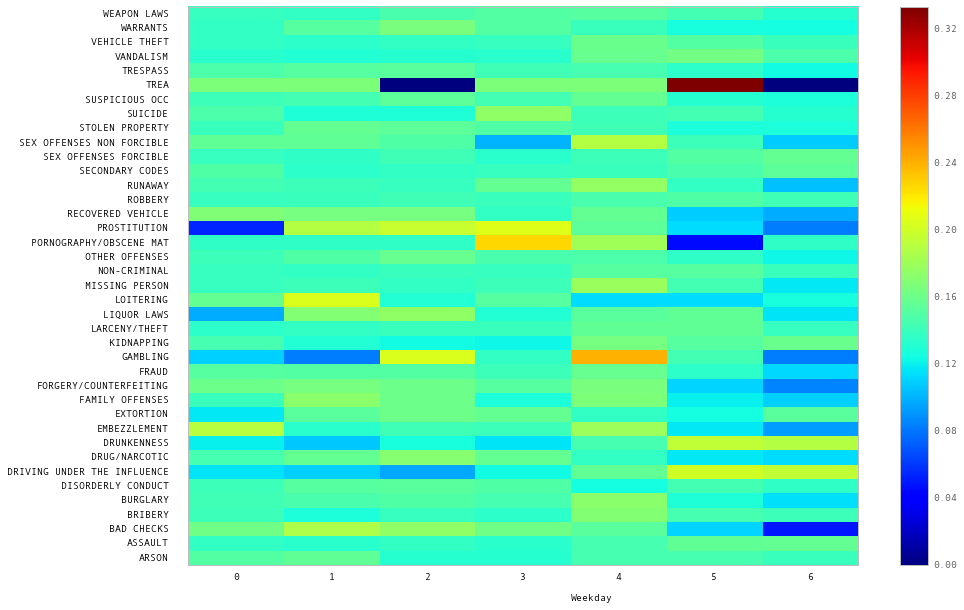

In [5]:
plot_category_vs_time(sfcrime_train,"Weekday",donorm=True)

What about by hour?

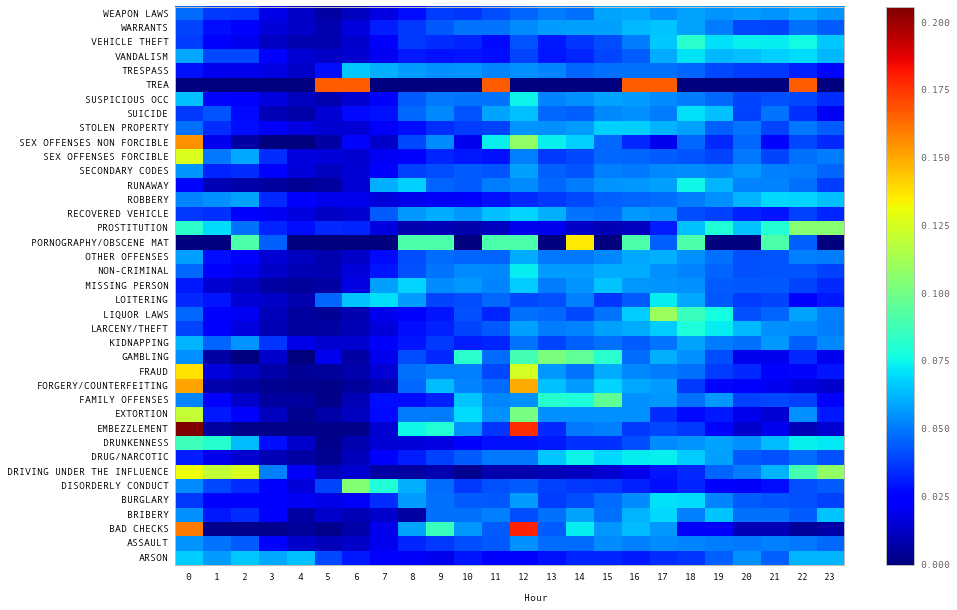

In [6]:
plot_category_vs_time(sfcrime_train,"Hour",donorm=True)

By Year?

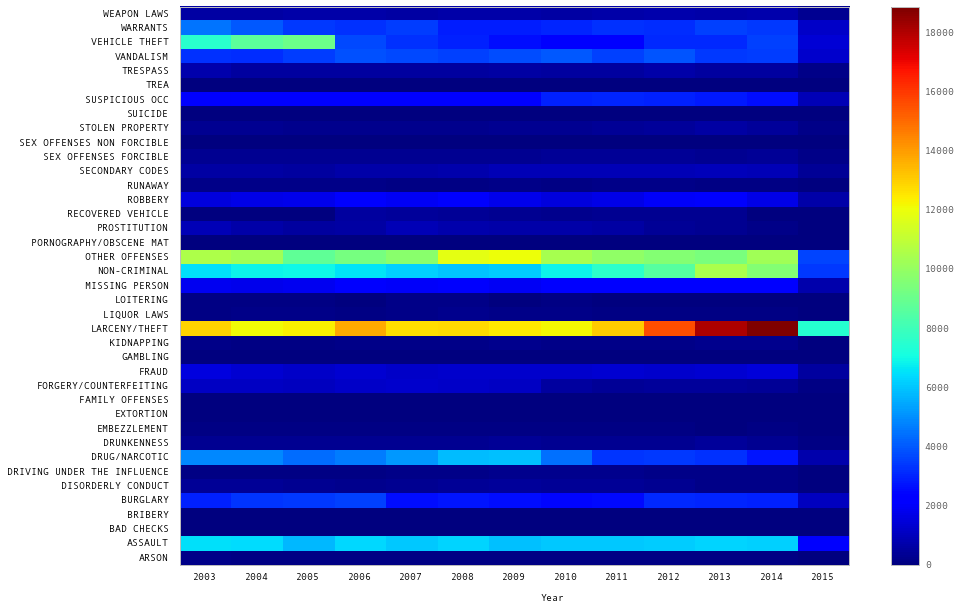

In [7]:
plot_category_vs_time(sfcrime_train,"Year")

By Month?

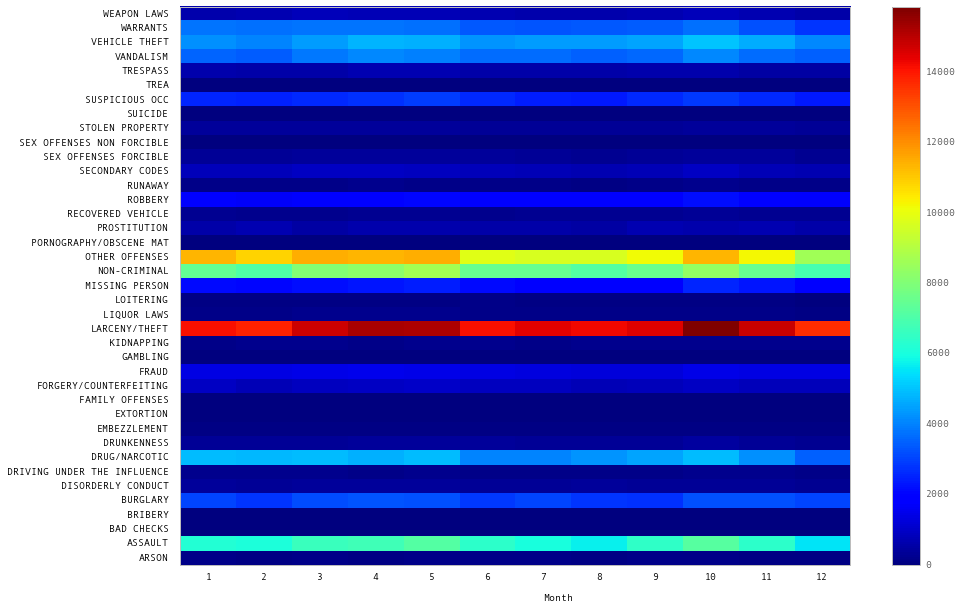

In [8]:
plot_category_vs_time(sfcrime_train,"Month")

Since there seems to be some dependence on time. Especially by year and time of day, let's add this as individual features

In [9]:
def set_time_features(df):
    df['Hour'] = df.index.hour
    df['Weekday'] = df.index.weekday
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Day'] = df.index.dayofyear
    return df

sfcrime_train = set_time_features(sfcrime_train)
sfcrime_test = set_time_features(sfcrime_test)
sfcrime_train

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Hour,Weekday,Year,Month,Day
Dates,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,2,2015,5,133
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,2,2015,5,133
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,2,2015,5,133
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,2,2015,5,133
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,2,2015,5,133
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,23,2,2015,5,133
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,23,2,2015,5,133
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,23,2,2015,5,133
2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,23,2,2015,5,133


How do the crimes vary by district?

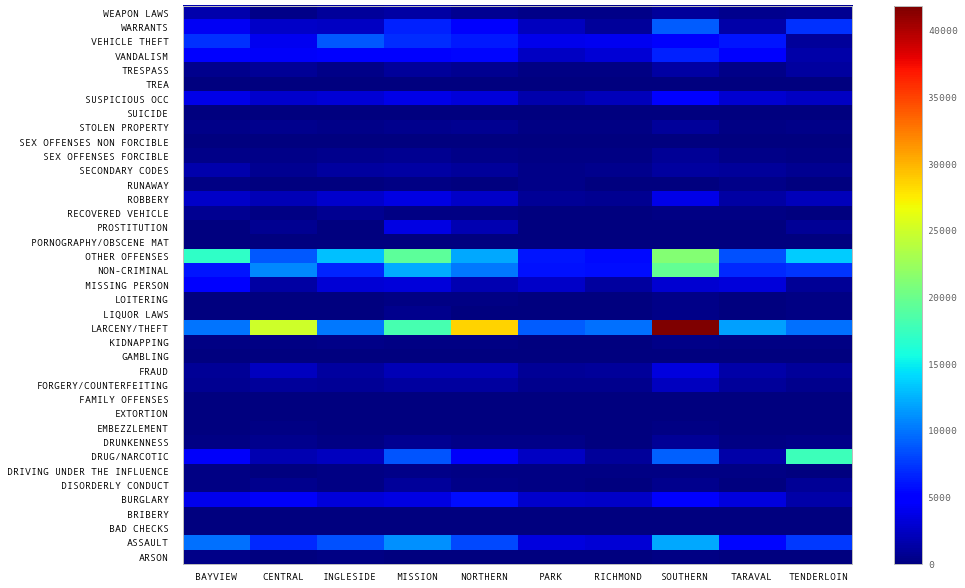

In [10]:
def group_by_district(df, district):
    return df[df['PdDistrict']==district].copy()
#create new data frame of types of crimes per district 
dset = {}
for district in sfcrime_train['PdDistrict'].unique():
    dset[district] = group_by_district(sfcrime_train,district)['Category'].value_counts()
dfCrimesPerDistrict = pd.DataFrame(dset)
plot_category_vs_feature(dfCrimesPerDistrict.transpose())

Most of the crimes are larceny, drugs, or "other offenses" and they occur mostly in a few districts. But what if we look at where certain crimes are more likely to occur?  Let's normalize each crime category by the total number of crimes in that category. 

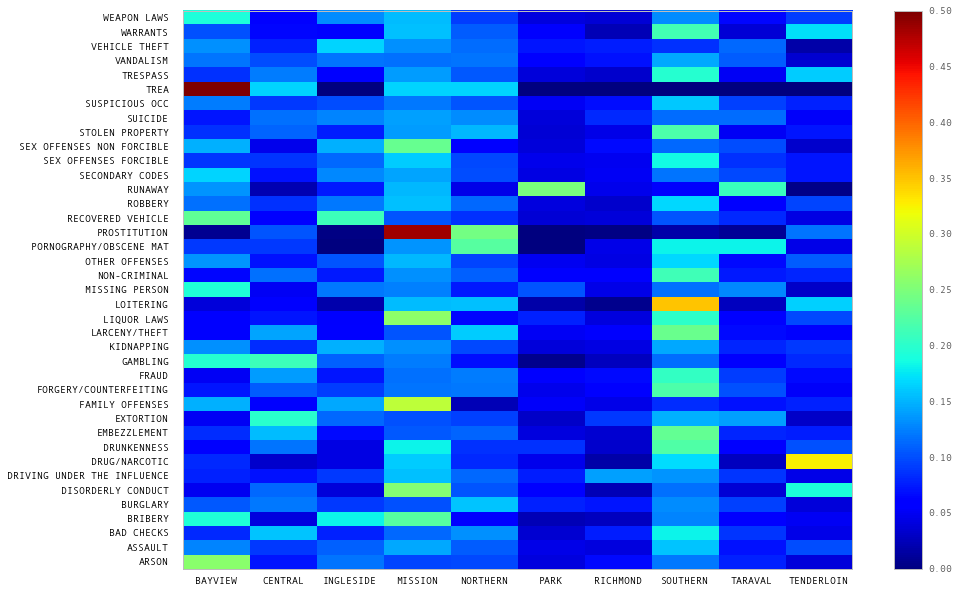

In [11]:
normalizedByCrimeDF = dfCrimesPerDistrict.div(dfCrimesPerDistrict.sum(axis=1), axis=0)
plot_category_vs_feature(normalizedByCrimeDF.transpose())

There are some striking observations here:
- 48% of PROSTITUTION cases occur in the MISSION district with another quarter in NORTHERN
- The TENDERLOIN clearly has a DRUG/NARCOTIC problem with 33% of it's crimes coming from that while in the other districts it's only a few percent.
- ARSON is much more common in BAYVIEW
- DISORDERLY CONDUCT is more common in the MISSION and TENDERLOIN
- DRUNKENNESS is more common in the MISSION and SOUTHERN
- FAMILY OFFSENSE is more common in the MISSION
- FORGERY/COUNTERFEITING is more common in SOUTHERN
- LARCENY/THEFT is more common in SOUTHERN

Clearly this is an important feature. It would be nice to not just have the police district but also it's proximity to other police districts. Here I've attempted to encode this information by adding a feature for each district which tells how close it is to other districts.

In [12]:
def assign_district_proximities(df):
    """Matrix of proximities with rows of districts in alphabetical order
    This should encode geographic proximities (or correlations) between districts
    This should be a symmetric matrix
    if the district is equal (i.e. diagonal) it gets a 1
    if they share a border it gets a 0.5
    if they do not share a border then they get a 0 unless the borders are unusual and they
    are very close. In that case I use some judgement and assin 0.25
    BAYVIEW	CENTRAL	INGLESIDE	MISSION	NORTHERN	PARK	RICHMOND	SOUTHERN	TARAVAL	TENDERLOIN
    """
    geographicProximity = [[1,0,.5,.5,0,0,0,.5,0,0], #bayview
                           [0,1,0,0,.5,0,0,.5,0,.5],#central
                           [.5,0,1,.5,0,.5,0,0,.5,0], #ingleside
                           [.5,0,.5,1,.25,.5,0,.5,0,.25],#mission
                           [0,.5,0,.25,1,.5,.5,.5,0,.5],#northern
                           [0,0,.5,.5,.5,1,.5,.25,.5,.25], #park
                           [0,0,0,0,.5,.5,1,0,.5,0],#richmond
                           [.5,.5,0,.5,.5,.25,0,1,0,.5], #southern
                           [0,0,.5,0,0,.5,.5,0,1,0], #taraval
                           [0,.5,0,.25,.5,.25,0,.5,0,1] #tenderloin
                           ]
    geographicProximityMatrix = np.matrix(geographicProximity)
    geographicProximityMatrix
    dset={}
    for row,header in zip(geographicProximity,np.sort(df['PdDistrict'].unique())):
        #print row,header
        dset[header]=row
    geographicProximityDF = pd.DataFrame(dset)
    geographicProximityDF.index = np.sort(df['PdDistrict'].unique())

    for district in geographicProximityDF.index:
        districtCol = geographicProximityDF[district][df['PdDistrict']]
        districtCol.index = df.index
        df[district] = districtCol
    #now we have extra features which encode proximity to other districts
assign_district_proximities(sfcrime_train)
assign_district_proximities(sfcrime_test)
sfcrime_train

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Hour,Weekday,Year,Month,Day,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Dates,,,,,,,,,,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,2,2015,5,133,0.0,0.5,0.0,0.25,1.00,0.50,0.5,0.50,0.0,0.50
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,2,2015,5,133,0.0,0.5,0.0,0.25,1.00,0.50,0.5,0.50,0.0,0.50
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,2,2015,5,133,0.0,0.5,0.0,0.25,1.00,0.50,0.5,0.50,0.0,0.50
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,2,2015,5,133,0.0,0.5,0.0,0.25,1.00,0.50,0.5,0.50,0.0,0.50
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,2,2015,5,133,0.0,0.0,0.5,0.50,0.50,1.00,0.5,0.25,0.5,0.25
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,23,2,2015,5,133,0.5,0.0,1.0,0.50,0.00,0.50,0.0,0.00,0.5,0.00
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,23,2,2015,5,133,0.5,0.0,1.0,0.50,0.00,0.50,0.0,0.00,0.5,0.00
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,23,2,2015,5,133,1.0,0.0,0.5,0.50,0.00,0.00,0.0,0.50,0.0,0.00
2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,23,2,2015,5,133,0.0,0.0,0.0,0.00,0.50,0.50,1.0,0.00,0.5,0.00


Relate Resolutions?

What about street names? Some of them do seem to be very correlated with certain crimes.
The problem with these addresses is that they contain very little information about proximity to each other. But, they might highlight problem streets.
On the other hand those that haver very few crimes on them tell us not much of anything.
So I have labeled those streets in the training set with less than 100 crimes as non-crime streets and the rest in the training and test get the same label of "Other"

In [ ]:
isCrimeStreet = sfcrime_train['Address'].value_counts() > 100
def labelNonCrimeStreets(x):
    try:
        if isCrimeStreet.loc[x]:
            return x
    except:
        pass
    x="Other"
    return x

def relabel_address(df):
    df['Address'] = df['Address'].map(labelNonCrimeStreets)
relabel_address(sfcrime_train)
relabel_address(sfcrime_test)
sfcrime_train

The datasets are time ordered. To avoid some kind of bias in the training algorithms, let's shuffle the training data.

In [13]:
import random
def shuffle(df):
    index = list(df.index)
    random.shuffle(index)
    df = df.ix[index]
    df.reset_index()
    return df
sfcrime_train = shuffle(sfcrime_train)

Ok, now let's clean things up for training by removing features we don't want, and encoding the features properly

In [18]:
def get_trainable_df(df,address=True,xy=True,district=True,
                     times=True,category=True):
    """returns new data frame using only features requested and
    creating dummy features for categorical variables"""
    columns = []
    if xy: 
        columns.append(df[['X','Y']])
    if district: 
        columns.append(df[['BAYVIEW','CENTRAL','INGLESIDE',
                          'MISSION','NORTHERN','PARK',
                          'RICHMOND','SOUTHERN','TARAVAL',
                          'TENDERLOIN']])
    if times: 
        columns.append(df[['Hour','Month','Year','Day','Weekday']])
    if address: 
        columns.append(pd.get_dummies(df['Address']))
    if category:
        columns.append(df[['Category']])

    return pd.concat(columns,axis=1)

train = get_trainable_df(sfcrime_train,address=False)
test = get_trainable_df(sfcrime_test,address=False,category=False)

And let's save these as a good measure

In [19]:
train.to_csv('../data/train_munged.csv')
test.to_csv('../data/test_munged.csv')

In [2]:
train = pd.read_csv('../data/train_munged.csv',parse_dates='Dates',index_col='Dates')
test = pd.read_csv('../data/test_munged.csv',parse_dates='Dates',index_col='Dates')

Now we can split up the data into the training and testing categories. We should also scale the features to have mean 0 and variance 1

In [3]:
X = np.array(train.drop('Category',1))
y = np.array(train['Category'].astype('category'))
#split up training set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

#to be used for training
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#used for submission
X_test_scaled_submission = scaler.transform(np.array(test.drop('Category')))

# SGD Classifier
Try to learn using SGDClassifier with kernel approximation to get new features.
Read up on this...

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_train_features = rbf_feature.fit_transform(X_train_scaled)
X_test_features = rbf_feature.transform(X_test_scaled)
X_test_features_submission = rbf_feature.transform(X_test_scaled_submission)

Run a grid search on the alpha value. 
Use a log loss function this seems to match the one used online

In [5]:
from sklearn.grid_search import GridSearchCV
param_grid = {'alpha' : 10. ** np.arange(-3, -2)}
grid_search = GridSearchCV(SGDClassifier(loss='log'), param_grid, verbose=3,scoring='log_loss')
grid_search.fit(X_train_features,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] alpha=0.001 .....................................................
Traceback (most recent call last):
  File "/Users/along528/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 970, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/Users/along528/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 233, in wrapped
    return f(*args, **kwargs)
  File "/Users/along528/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 267, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/Users/along528/anaconda/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/Users/along528/anaconda/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/Us

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.



KeyboardInterrupt



Unfortunately, your original traceback can not be constructed.



TypeError: 'NoneType' object is not iterable

In [7]:
%%time
sgd = SGDClassifier(loss='log',alpha=.001)
sgd.fit(X_train_features, y_train)

Traceback (most recent call last):
  File "/Users/along528/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 970, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/Users/along528/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 233, in wrapped
    return f(*args, **kwargs)
  File "/Users/along528/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 267, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/Users/along528/anaconda/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/Users/along528/anaconda/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/Users/along528/anaconda/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader_

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



TypeError: 'NoneType' object is not iterable

In [ ]:
sgd.score(X_train_features, y_train)

In [ ]:
sgd.score(X_test_features,y_test)

In [ ]:
probs = sgd.predict_proba(X_test_features_submission)
probs

In [ ]:
output.to_csv('../data/submission_sgd.csv')

# SVM Classifier

To run the SVM, it is actually far too much to train on the whole dataset. Could try to train on separate years.

In [8]:
nrows = 10000
train_short = train[:nrows].copy()

Rescale on new shortened dataset

In [9]:
X = np.array(train_short.drop('Category',1))
y = np.array(train_short['Category'].astype('category'))
#split up training set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

#to be used for training
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#used for submission
X_test_scaled_submission = scaler.transform(np.array(test.drop('Category')))

In [10]:
from sklearn.svm import LinearSVC,SVC

In [11]:
param_grid = {'C': 10. ** np.arange(-3, 3), 'gamma' : 10. ** np.arange(-5, 0)}
from sklearn.grid_search import GridSearchCV
#better loss function?
grid_search = GridSearchCV(SVC(), param_grid, verbose=3)
grid_search.fit(X_train_scaled,y_train)
grid_search.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.224433 -   2.7s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.225330 -   2.7s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.226651 -   2.7s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .................. C=0.001, gamma=0.0001, score=0.224433 -   2.8s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .................. C=0.001, gamma=0.0001, score=0.225330 -   2.6s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .................. C=0.001, gamma=0.0001, score=0.226651 -   2.7s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ...........

/Users/along528/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)
[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:  1.5min



[CV] C=0.1, gamma=1e-05 ..............................................
[CV] ..................... C=0.1, gamma=1e-05, score=0.225330 -   2.9s
[CV] C=0.1, gamma=1e-05 ..............................................
[CV] ..................... C=0.1, gamma=1e-05, score=0.226651 -   3.2s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.224433 -   3.2s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.225330 -   3.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.226651 -   3.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.224433 -   3.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.225330 -   3.1s
[CV] 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  6.6min finished


{'C': 10.0, 'gamma': 0.01}

In [16]:
%%time
svm = SVC(C=10,gamma=.01,probability=True)
svm.fit(X_train_scaled,y_train)

CPU times: user 1min 12s, sys: 1.1 s, total: 1min 13s
Wall time: 1min 18s


In [17]:
svm.score(X_train_scaled, y_train)

0.24773333333333333

In [18]:
svm.score(X_test_scaled,y_test)

0.23119999999999999

In [20]:
probs = svm.predict_proba(X_test_scaled_submission)
probs

array([[ 0.00103025,  0.08518405,  0.00115221, ...,  0.06443841,
         0.02809142,  0.01042946],
       [ 0.00102714,  0.08624537,  0.00115391, ...,  0.06293659,
         0.02813872,  0.010696  ],
       [ 0.00092187,  0.068473  ,  0.00079623, ...,  0.09194626,
         0.03191428,  0.00732988],
       ..., 
       [ 0.00144457,  0.09637788,  0.00173255, ...,  0.1812319 ,
         0.02727248,  0.00836568],
       [ 0.00129586,  0.09463194,  0.00150808, ...,  0.11953252,
         0.03289519,  0.0094173 ],
       [ 0.00104594,  0.08070917,  0.00140057, ...,  0.11076207,
         0.0239428 ,  0.0102174 ]])

Have to manually insert missing categories (expect 39)

In [23]:
svm.classes_

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'KIDNAPPING',
       'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
       'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
       'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY',
       'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
       'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUSPICIOUS OCC',
       'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [33]:
output = pd.DataFrame(probs,columns=svm.classes_)

output.index.name = 'Id'
for category in train['Category'].value_counts().index:
    if category not in svm.classes_:
        output[category] = 0.
output.shape

(884262, 39)

In [34]:
output.to_csv('../data/submission_svm.csv')

Gives a score on Kaggle of 2.66682 (current best) number 1 score is 2.05